In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

plt.style.use('bmh')

In [2]:
#import csv
df = pd.read_csv('C:\\Users\\sabri\\Desktop\\real_estate.csv', sep=',', error_bad_lines = False, index_col = False, dtype = 'unicode')
df.head()

,borough,neighborhood,building_class_category,tax_class,block,lot,building_class_present,address,zipcode,ownername,...,bbl,xcoord,ycoord,zonemap,sanborn,taxmap,latitude,longitude,sales_price,sales_date
0,SI,NEW BRIGHTON-ST. GEORGE,10 COOPS - ELEVATOR APARTMENTS,2,1,216,D0,"10 BAY STREET LANDING, 4C-D",10301,BSL ONE OWNERS CORP,...,5000010216,963722,171768,21c,501 017,50101,40.6381162,-74.0739646,750000,6/11/2020
1,SI,NEW BRIGHTON-ST. GEORGE,10 COOPS - ELEVATOR APARTMENTS,2,1,216,D0,"20 BAY STREET LANDING, 1F",10301,BSL ONE OWNERS CORP,...,5000010216,963722,171768,21c,501 017,50101,40.6381162,-74.0739646,610000,5/18/2020
2,SI,NEW BRIGHTON-ST. GEORGE,10 COOPS - ELEVATOR APARTMENTS,2,1,216,D0,"10 BAY STREET LANDING, 7F",10301,BSL ONE OWNERS CORP,...,5000010216,963722,171768,21c,501 017,50101,40.6381162,-74.0739646,575000,9/18/2019
3,SI,NEW BRIGHTON-ST. GEORGE,10 COOPS - ELEVATOR APARTMENTS,2,1,216,D0,"10 BAY STREET LANDING, 4H",10301,BSL ONE OWNERS CORP,...,5000010216,963722,171768,21c,501 017,50101,40.6381162,-74.0739646,525000,8/8/2018
4,SI,NEW BRIGHTON-ST. GEORGE,10 COOPS - ELEVATOR APARTMENTS,2,1,216,D0,"10 BAY STREET LANDING, 4AB",10301,BSL ONE OWNERS CORP,...,5000010216,963722,171768,21c,501 017,50101,40.6381162,-74.0739646,520000,2/20/2020


In [3]:
#missing columns count
missing_columns = df.isnull().sum()
missing_columns

borough                     0
neighborhood                0
building_class_category     0
tax_class                   1
block                       0
                           ..
taxmap                     59
latitude                    3
longitude                   3
sales_price                 0
sales_date                  0
Length: 76, dtype: int64

In [4]:
#total missing values
total_cells = np.product(df.shape)
total_missing = missing_columns.sum()

percent_missing = (total_missing/total_cells) *100
print(percent_missing)

0.9990161452757856


In [5]:
#drop columns with more than 30% of missing data
df2 = df[[column for column in df if df[column].count()/len(df) >= .3]]
print("List of dropped columns: ", end = ' ')
for c in df:
    if c not in df2:
        print(c, end = ', ')
print('\n')
df = df2


List of dropped columns:  



In [6]:
#dropping the missing data
df.dropna()

,borough,neighborhood,building_class_category,tax_class,block,lot,building_class_present,address,zipcode,ownername,...,bbl,xcoord,ycoord,zonemap,sanborn,taxmap,latitude,longitude,sales_price,sales_date
3,SI,NEW BRIGHTON-ST. GEORGE,10 COOPS - ELEVATOR APARTMENTS,2,1,216,D0,"10 BAY STREET LANDING, 4H",10301,BSL ONE OWNERS CORP,...,5000010216,963722,171768,21c,501 017,50101,40.6381162,-74.0739646,525000,8/8/2018
6,SI,NEW BRIGHTON-ST. GEORGE,10 COOPS - ELEVATOR APARTMENTS,2,1,216,D0,"20 BAY STREET LANDING, 1H",10301,BSL ONE OWNERS CORP,...,5000010216,963722,171768,21c,501 017,50101,40.6381162,-74.0739646,485000,6/28/2018
10,SI,NEW BRIGHTON-ST. GEORGE,10 COOPS - ELEVATOR APARTMENTS,2,1,216,D0,"10 BAY STREET LANDING, 7G",10301,BSL ONE OWNERS CORP,...,5000010216,963722,171768,21c,501 017,50101,40.6381162,-74.0739646,405000,6/15/2018
14,MN,FINANCIAL,40 SELECTED GOVERNMENTAL FACILITIES,4,2,2,Y7,10 SOUTH STREET,10004,10 SOUTH STREET LLC,...,1000020002,981037,194506,12b,11N 100,10101,40.7005502,-74.0115876,0,8/16/2018
15,SI,NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,3,55,B9,376 RICHMOND TERRACE,10301,"FICI, NEDIN",...,5000030055,960402,175371,21c,501 015,50101,40.6479974,-74.0859396,930000,6/19/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124532,QN,BREEZY POINT,01 ONE FAMILY DWELLINGS,1D,16350,400,A8,"9 NEPTUNE WALK, 992",11697,"BREEZY POINT COOPERATIVE, INC",...,4163500400,1006277,142173,30d,421 061,46003,40.5568804,-73.9207308,0,12/3/2018
124533,QN,BREEZY POINT,01 ONE FAMILY DWELLINGS,1D,16350,400,A8,"24 ROOSEVELT WALK, 1636",11697,"BREEZY POINT COOPERATIVE, INC",...,4163500400,1006277,142173,30d,421 061,46003,40.5568804,-73.9207308,0,11/21/2018
124534,QN,BREEZY POINT,01 ONE FAMILY DWELLINGS,1D,16350,400,A8,"12 QUEENS WALK, 1378",11697,"BREEZY POINT COOPERATIVE, INC",...,4163500400,1006277,142173,30d,421 061,46003,40.5568804,-73.9207308,0,9/18/2018
124535,QN,BREEZY POINT,01 ONE FAMILY DWELLINGS,1D,16350,400,A8,"204-26 9TH AVENUE, 2240",11697,"BREEZY POINT COOPERATIVE, INC",...,4163500400,1006277,142173,30d,421 061,46003,40.5568804,-73.9207308,0,5/17/2018


In [7]:
#convert releveant dtypes to numerical digits
df['easements'] = df['easements'].astype(float)
df['residential_unit'] = df['residential_unit'].astype(float)
df['commercial_unit'] = df['commercial_unit'].astype(float)
df['total_unit'] = df['total_unit'].astype(float)
df['lotarea'] = df['lotarea'].astype(float)
df['bldgarea'] = df['bldgarea'].astype(float)
df['comarea'] = df['comarea'].astype(float)
df['resarea'] = df['resarea'].astype(float)
df['officearea'] = df['officearea'].astype(float)
df['retailarea'] = df['retailarea'].astype(float)
df['garagarea'] = df['garagearea'].astype(float)
df['strgearea'] = df['strgearea'].astype(float)
df['factryarea'] = df['factryarea'].astype(float)
df['otherarea'] = df['otherarea'].astype(float)
df['numbldgs'] = df['numbldgs'].astype(float)
df['numfloors'] = df['numfloors'].astype(float)
df['unitsres'] = df['unitsres'].astype(float)
df['unitstotal'] = df['unitstotal'].astype(float)
df['lotfront'] = df['lotfront'].astype(float)
df['lotdepth'] = df['lotdepth'].astype(float)
df['bldgfront'] = df['bldgfront'].astype(float)
df['bldgdepth'] = df['bldgdepth'].astype(float)
df['assessland'] = df['assessland'].astype(float)
df['assesstot'] = df['assesstot'].astype(float)
df['exempttot'] = df['exempttot'].astype(float)
df['yearalter1'] = df['yearalter1'].astype(float)
df['yearalter2'] = df['yearalter2'].astype(float)
df['builtfar'] = df['builtfar'].astype(float)
df['residfar'] = df['residfar'].astype(float)
df['commfar'] = df['commfar'].astype(float)
df['facilfar'] = df['facilfar'].astype(float)
df['sales_price'] = df['sales_price'].astype(float)

In [8]:
#see the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124537 entries, 0 to 124536
Data columns (total 77 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   borough                  124537 non-null  object 
 1   neighborhood             124537 non-null  object 
 2   building_class_category  124537 non-null  object 
 3   tax_class                124536 non-null  object 
 4   block                    124537 non-null  object 
 5   lot                      124537 non-null  object 
 6   building_class_present   124536 non-null  object 
 7   address                  124537 non-null  object 
 8   zipcode                  124537 non-null  object 
 9   ownername                124504 non-null  object 
 10  yearbuilt                124508 non-null  object 
 11  tax_class_sale           124537 non-null  object 
 12  building_class_sale      124537 non-null  object 
 13  cd                       124536 non-null  object 
 14  ct20

In [9]:
#Dropping values where the sales price is less than 100000
df = df[df['sales_price']> 100000 ]

In [10]:
#selecting for the tax_class
df = df.loc[df.tax_class == '1']

In [11]:
#sales price distribution 
print(df['sales_price'].describe())

count    5.843200e+04
mean     8.645827e+05
std      1.294057e+06
min      1.014000e+05
25%      4.990000e+05
50%      6.678000e+05
75%      9.200000e+05
max      7.710000e+07
Name: sales_price, dtype: float64


In [12]:
#dtypes
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O')]

In [13]:
#Selecting numerical dtypes
df_num = df.select_dtypes(include = ['float64'])
df_num.head()

,easements,residential_unit,commercial_unit,total_unit,lotarea,bldgarea,comarea,resarea,officearea,retailarea,...,assesstot,exempttot,yearalter1,yearalter2,builtfar,residfar,commfar,facilfar,sales_price,garagarea
15,0.0,2.0,0.0,2.0,2604.0,3200.0,0.0,3200.0,0.0,0.0,...,35880.0,0.0,0.0,0.0,1.23,1.25,0.0,2.0,930000.0,0.0
16,0.0,2.0,0.0,2.0,1700.0,1054.0,0.0,1054.0,0.0,0.0,...,21120.0,0.0,0.0,0.0,0.62,1.25,0.0,2.0,559000.0,0.0
61,0.0,2.0,0.0,2.0,2300.0,1682.0,0.0,1682.0,0.0,0.0,...,36300.0,0.0,0.0,0.0,0.73,2.43,3.4,4.8,700000.0,0.0
68,0.0,2.0,0.0,2.0,6908.0,2354.0,0.0,2354.0,0.0,0.0,...,33060.0,0.0,0.0,0.0,0.34,0.50,0.0,1.0,675000.0,0.0
69,0.0,2.0,0.0,2.0,3404.0,2208.0,0.0,2208.0,0.0,0.0,...,33060.0,0.0,0.0,0.0,0.65,0.50,0.0,1.0,500000.0,0.0


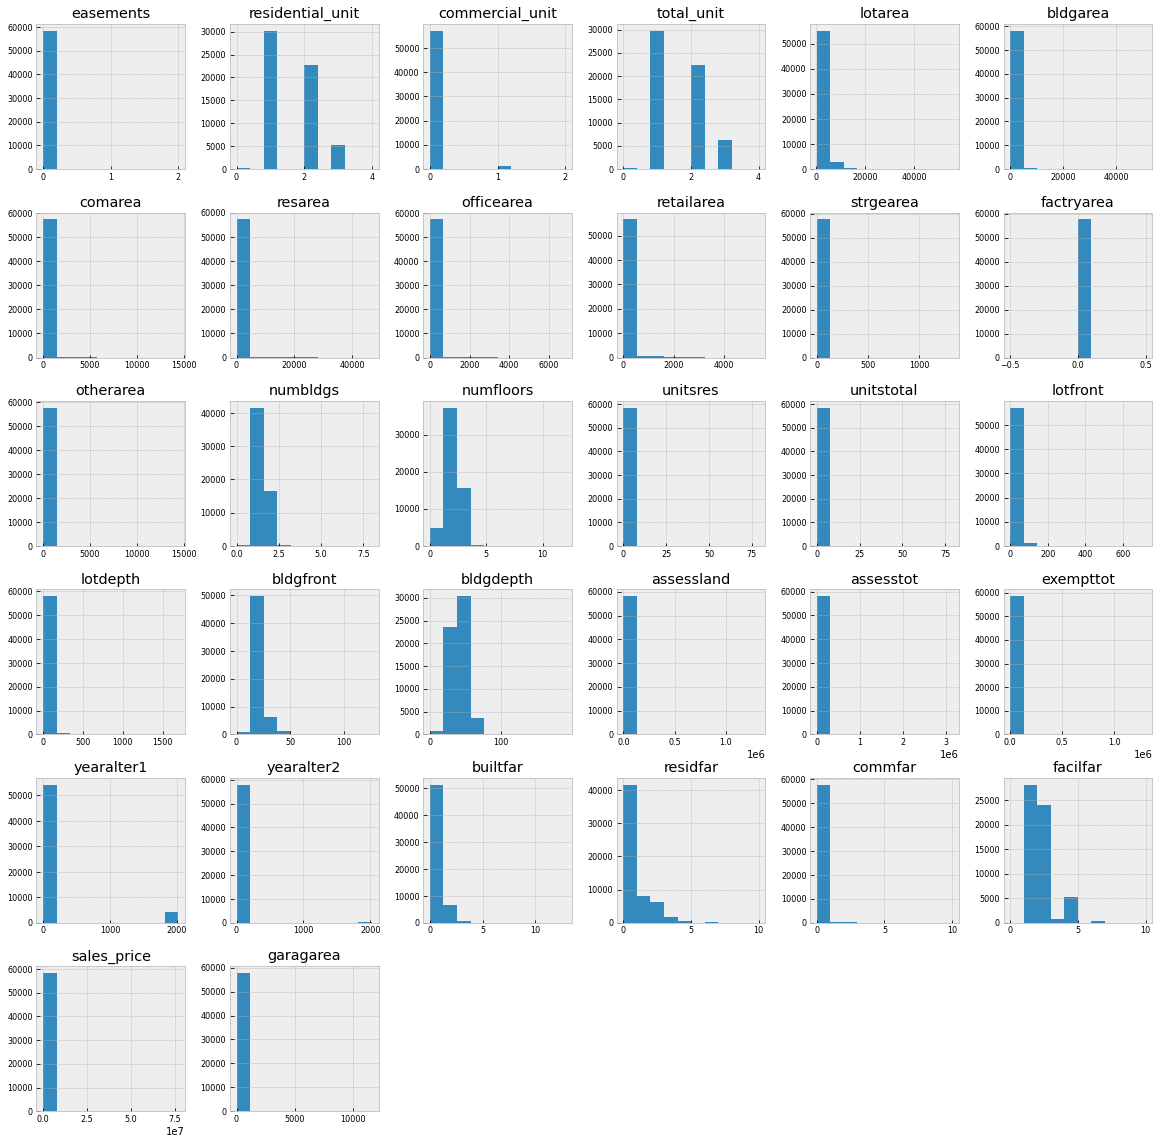

In [14]:
#plotting numerical categories
df_num.hist(figsize = (20,20), bins =10, xlabelsize = 8, ylabelsize =8);

In [15]:
#values highly correlated with sales price 
df_num_corr = df_num.corr()['sales_price'][:-2]
golden_features_list = df_num_corr[abs(df_num_corr) >.5].sort_values(ascending = True)
print("There is {} highly correlated values with sales price:\n {}".format(len(golden_features_list), golden_features_list))

There is 2 highly correlated values with sales price:
 assessland    0.588100
assesstot     0.679887
Name: sales_price, dtype: float64


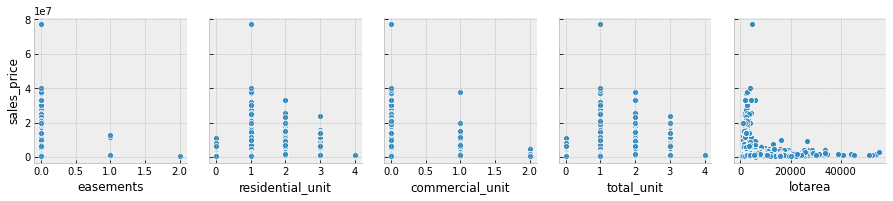

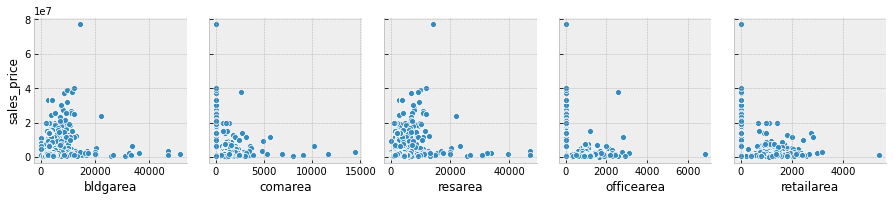

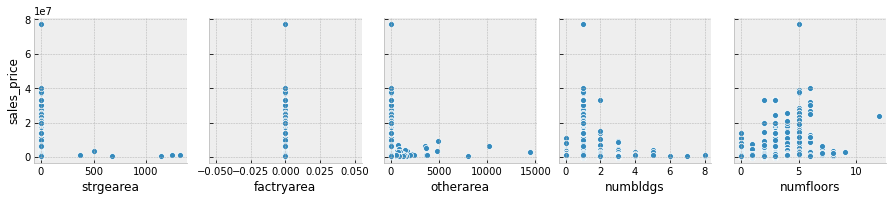

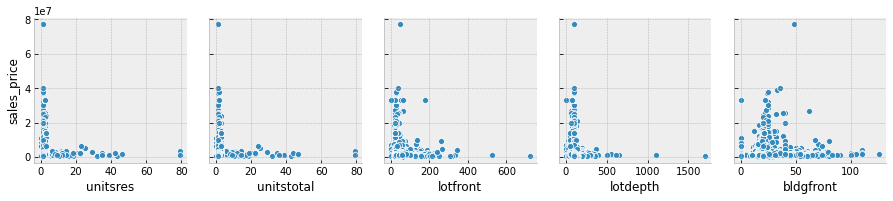

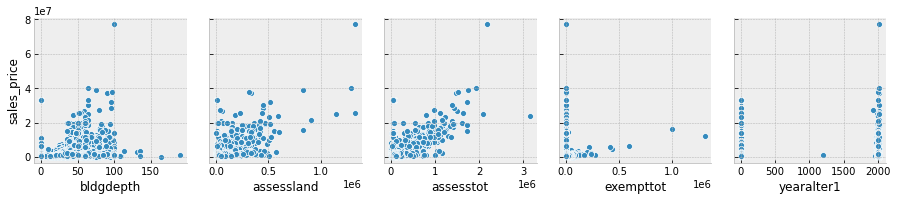

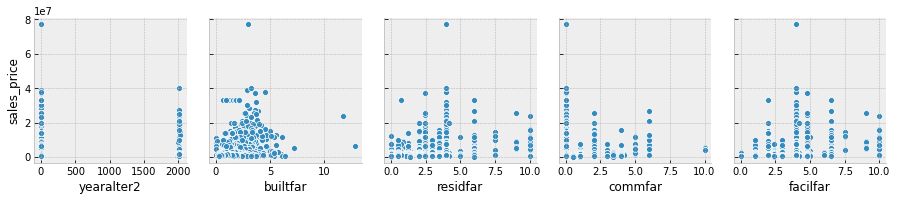

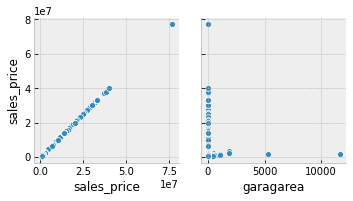

In [16]:
#comparing sales price to numerical columns
for i in range(0, len(df_num.columns),5):
    sns.pairplot(data = df_num, 
                x_vars = df_num.columns[i:i+5], 
                 y_vars = ['sales_price'])
    

In [17]:
#finding features that correlate with sales_price
import operator 

individual_features_df =[]
for i in range(0, len(df_num.columns) - 2):
    tmpDf = df_num[[df_num.columns[i], 'sales_price']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['sales_price'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key = operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key,value))

      strgearea: -0.5281855723937551
     yearalter1: -0.06359087097354793
       numbldgs: -0.038459823110000485
      easements: -0.027645595651523466
       lotdepth: -0.011521195557157977
     yearalter2: 0.0035670014505332745
        lotarea: 0.014117712037337119
       lotfront: 0.016628913237724224
commercial_unit: 0.01796833390709687
       unitsres: 0.07902483967173082
     unitstotal: 0.08930180573321642
      bldgfront: 0.10090814558366418
residential_unit: 0.10357787784499516
     total_unit: 0.11770937161765709
        comarea: 0.15581178569819412
     retailarea: 0.15759900068861002
       facilfar: 0.1962572142911913
      bldgdepth: 0.21876211323519984
      numfloors: 0.23002838726185945
     officearea: 0.23329161477602697
       residfar: 0.27253826710379014
        resarea: 0.33480284184925885
       builtfar: 0.3350395791170064
       bldgarea: 0.35747243169555215
     factryarea:             nan
        commfar: 0.34740531422886917
      otherarea: 0.4176639184338

In [18]:
#highly correlated values
golden_features_list = [key for key, value in all_correlations if abs(value)>=.5]
print("There is {} highly correlated values with the sales price:\n {}".format(len(golden_features_list), golden_features_list))

There is 3 highly correlated values with the sales price:
 ['strgearea', 'assessland', 'assesstot']


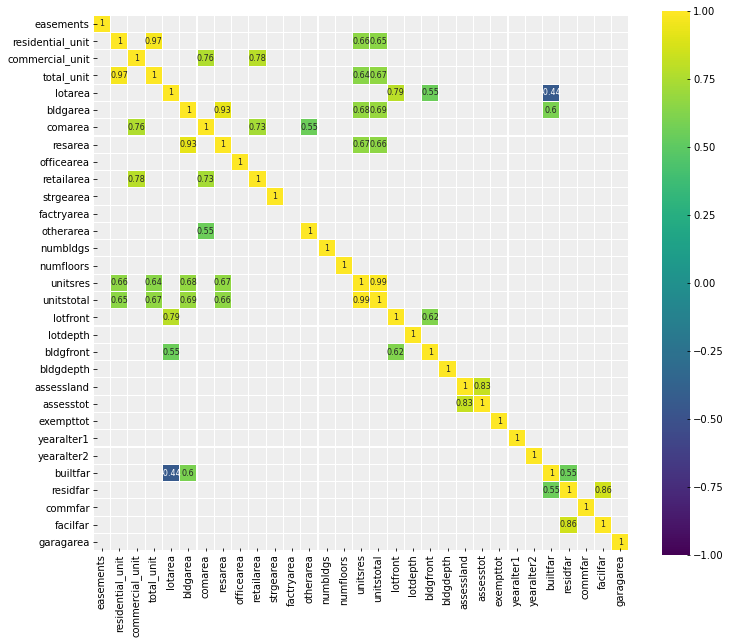

In [19]:
#feature to feature relationship
corr = df_num.drop('sales_price', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [20]:
#quantitative feature list

quantitative_features_list = ['yearbuilt', 'easements', 'residential_unit', 'commercial_unit', 'total_unit', 'lotarea', 'bldgarea',
    'comarea', 'resarea', 'officearea', 'retailarea', 'garagarea', 'strgearea', 'factryarea',
    'otherarea', 'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 
    'bldgdepth', 'assessland', 'assesstot', 'exempttot', 'yearalter1', 'yearalter2', 'builtfar', 'residfar', 'commfar', 'facilfar', 
    'sales_price']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()


,yearbuilt,easements,residential_unit,commercial_unit,total_unit,lotarea,bldgarea,comarea,resarea,officearea,...,assessland,assesstot,exempttot,yearalter1,yearalter2,builtfar,residfar,commfar,facilfar,sales_price
15,1920,0.0,2.0,0.0,2.0,2604.0,3200.0,0.0,3200.0,0.0,...,8400.0,35880.0,0.0,0.0,0.0,1.23,1.25,0.0,2.0,930000.0
16,1874,0.0,2.0,0.0,2.0,1700.0,1054.0,0.0,1054.0,0.0,...,6240.0,21120.0,0.0,0.0,0.0,0.62,1.25,0.0,2.0,559000.0
61,1925,0.0,2.0,0.0,2.0,2300.0,1682.0,0.0,1682.0,0.0,...,8520.0,36300.0,0.0,0.0,0.0,0.73,2.43,3.4,4.8,700000.0
68,1915,0.0,2.0,0.0,2.0,6908.0,2354.0,0.0,2354.0,0.0,...,12660.0,33060.0,0.0,0.0,0.0,0.34,0.50,0.0,1.0,675000.0
69,1910,0.0,2.0,0.0,2.0,3404.0,2208.0,0.0,2208.0,0.0,...,7140.0,33060.0,0.0,0.0,0.0,0.65,0.50,0.0,1.0,500000.0


In [21]:
#highly correlated values list 
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('sales_price')
features_to_analyse

['strgearea', 'assessland', 'assesstot', 'sales_price']

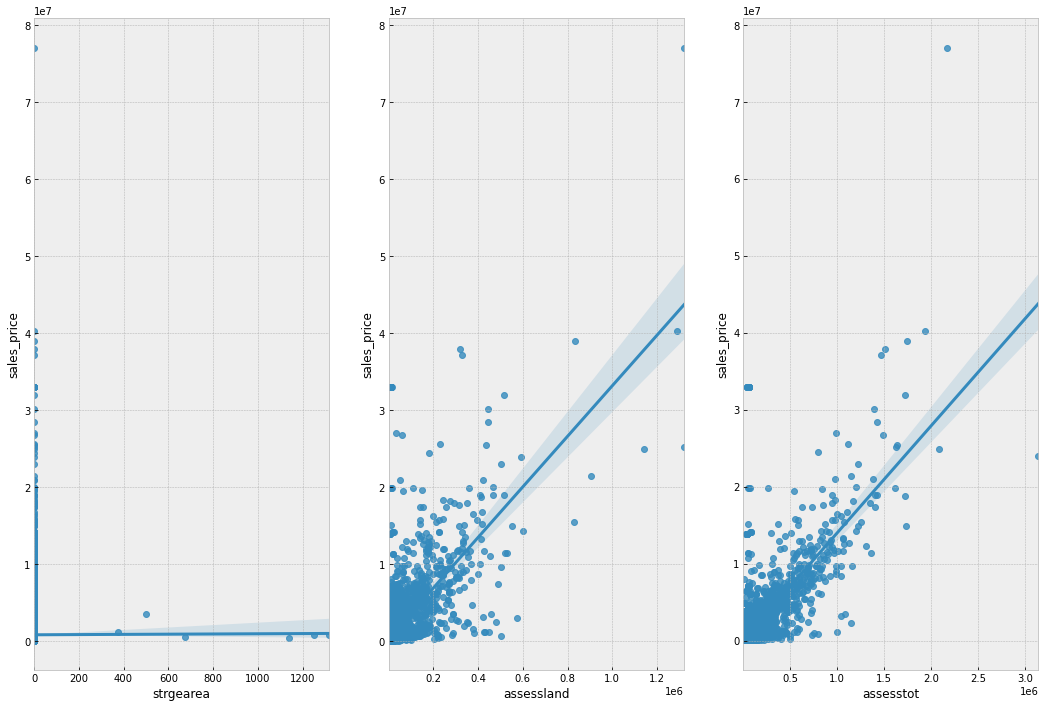

In [22]:
#highly correlated values distribution 
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='sales_price', data=df[features_to_analyse], ax=ax)

In [23]:
#categorical values selection
categorical_features = [a for a in quantitative_features_list[:-2] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,borough,neighborhood,building_class_category,tax_class,block,lot,building_class_present,address,zipcode,ownername,...,bbl,xcoord,ycoord,zonemap,sanborn,taxmap,latitude,longitude,sales_price,sales_date
15,SI,NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,3,55,B9,376 RICHMOND TERRACE,10301,"FICI, NEDIN",...,5000030055,960402,175371,21c,501 015,50101,40.6479974,-74.0859396,930000.0,6/19/2020
16,SI,NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,3,22,B1,17 CARROLL PLACE,10301,"KALYTA, DARIIA",...,5000030022,960260,175172,21c,501 015,50101,40.6474508,-74.0864507,559000.0,6/29/2020
61,SI,NEW BRIGHTON-ST. GEORGE,02 TWO FAMILY DWELLINGS,1,11,3,B3,257 ST MARKS PLACE,10301,"SUKALIC, AMIR",...,5000110003,962296,173805,21c,501 007,50101,40.643704,-74.0791093,700000.0,12/11/2018
68,SI,NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,14,21,B2,272 RICHMOND TERRACE,10301,"JACOBS, BELKIS",...,5000140021,961364,175105,21c,501 015,50101,40.6472698,-74.082472,675000.0,1/25/2019
69,SI,NEW BRIGHTON,02 TWO FAMILY DWELLINGS,1,14,99,B1,248 RICHMOND TERRACE,10301,"WSZEBOROWSKI, KRZYSZTOF",...,5000140099,961616,175083,21c,501 015,50101,40.6472101,-74.0815639,500000.0,10/3/2019


In [24]:
#categorical features
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 44 non numerical features including:
['borough', 'neighborhood', 'building_class_category', 'tax_class', 'block', 'lot', 'building_class_present', 'address', 'zipcode', 'ownername', 'tax_class_sale', 'building_class_sale', 'cd', 'ct2010', 'cb2010', 'schooldist', 'council', 'firecomp', 'policeprct', 'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict', 'sanitsub', 'zonedist1', 'splitzone', 'landuse', 'garagearea', 'areasource', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'borocode', 'bbl', 'xcoord', 'ycoord', 'zonemap', 'sanborn', 'taxmap', 'latitude', 'longitude', 'sales_date']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

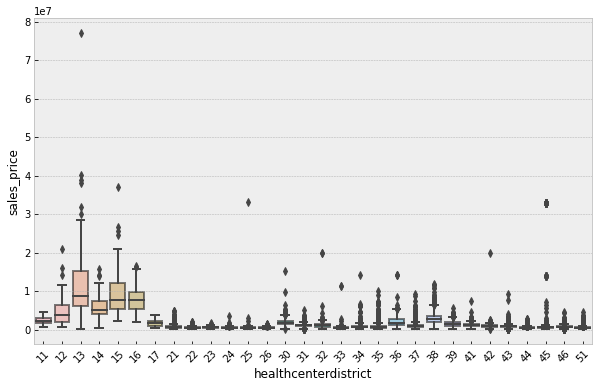

In [25]:
#comparing sales_price to the health center district

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='healthcenterdistrict', y='sales_price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

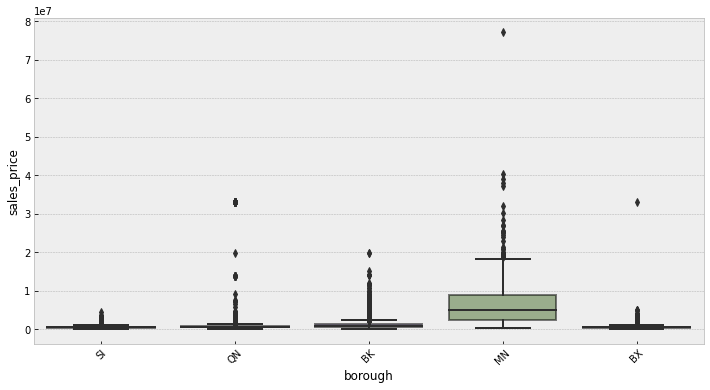

In [26]:
#comparing sales_price to the borough

plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='borough', y='sales_price', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [27]:
#analyzing subset of categorical data
qualitative_feature_list = ['borough', 'tax_class', 'council', 'firecomp', 'policeprct']
df_qualitative_values = df[qualitative_feature_list]
df_qualitative_values.head()

,borough,tax_class,council,firecomp,policeprct
15,SI,1,49,E155,120
16,SI,1,49,E155,120
61,SI,1,49,E155,120
68,SI,1,49,E155,120
69,SI,1,49,E155,120


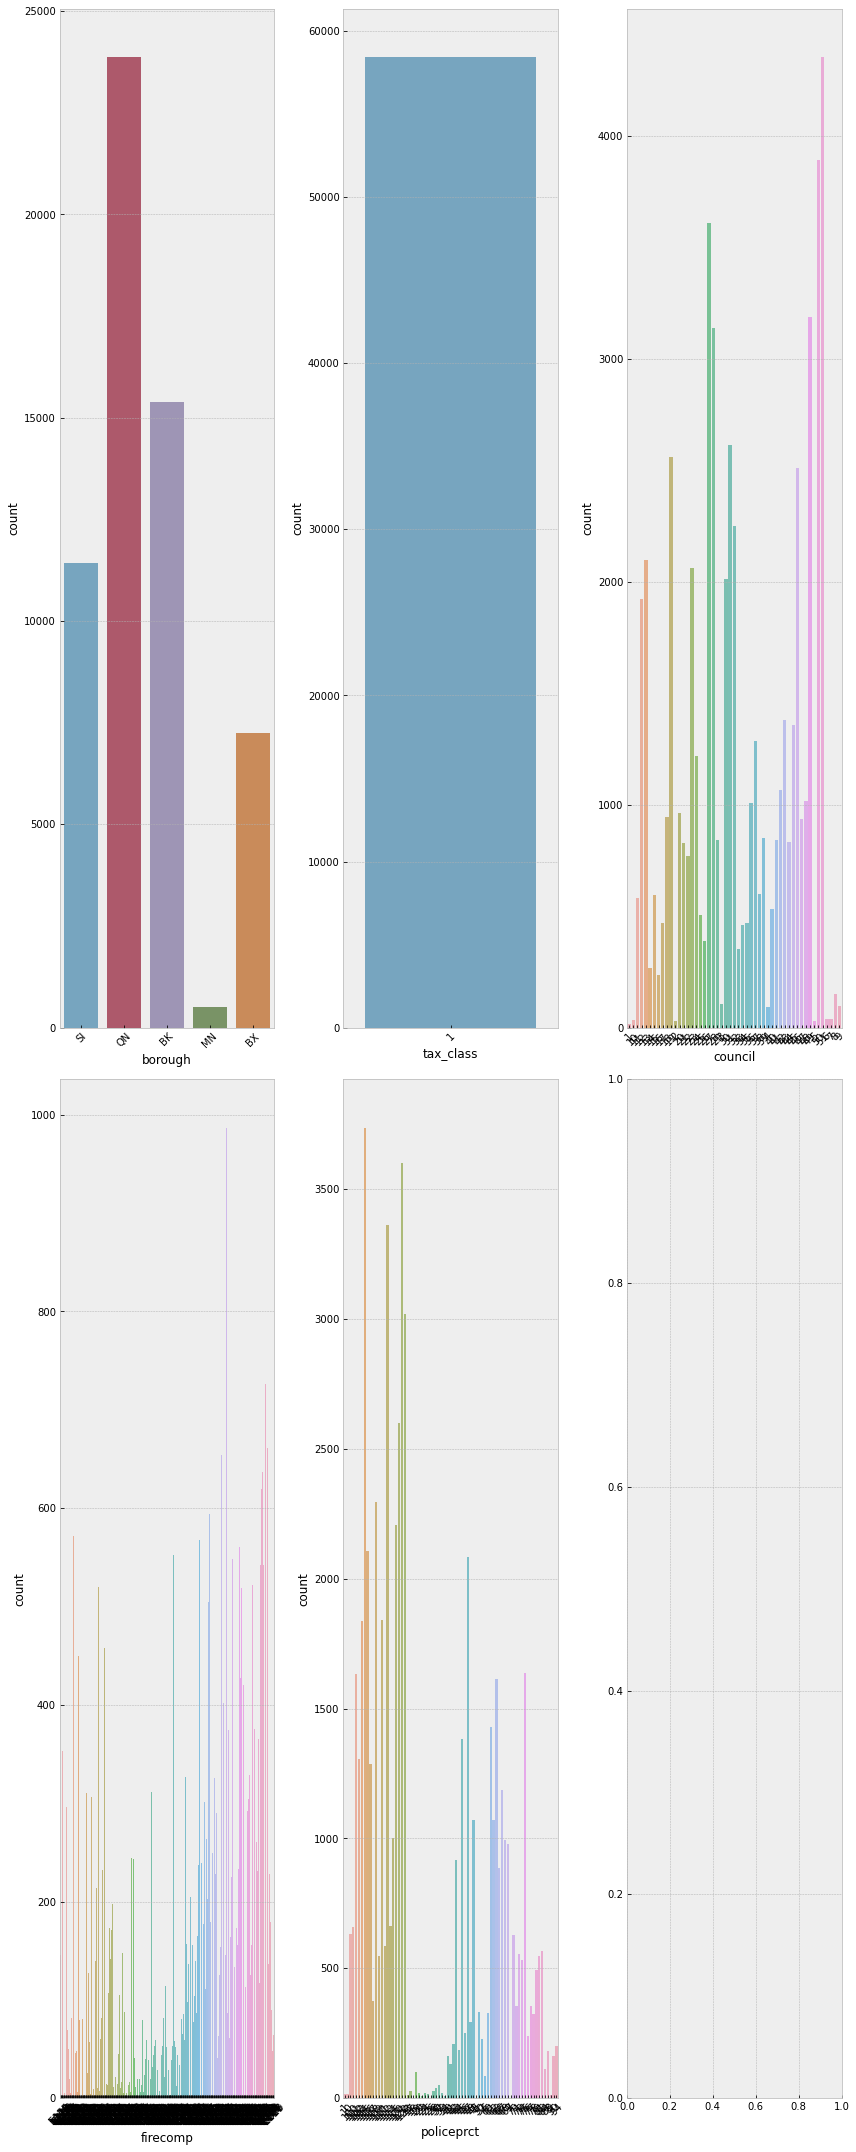

In [28]:
#visualizing subset of categorical data
fig, axes = plt.subplots(round(len(df_qualitative_values.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_qualitative_values.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_qualitative_values.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

In [29]:
#one hot encoding
y = pd.get_dummies(df_not_num.columns)
print(y.head())

   address  areasource  bbl  block  borocode  borough  bsmtcode  \
0        0           0    0      0         0        1         0   
1        0           0    0      0         0        0         0   
2        0           0    0      0         0        0         0   
3        0           0    0      0         0        0         0   
4        0           0    0      1         0        0         0   

   building_class_category  building_class_present  building_class_sale  ...  \
0                        0                       0                    0  ...   
1                        0                       0                    0  ...   
2                        1                       0                    0  ...   
3                        0                       0                    0  ...   
4                        0                       0                    0  ...   

   schooldist  splitzone  tax_class  tax_class_sale  taxmap  xcoord  ycoord  \
0           0          0          0  